### IMPORT LIBRARY (PANDAS & MATPLOTLIB)

In [33]:
import pandas as pd
import matplotlib.pyplot as plot

### MEMBACA DATASET

In [34]:
df = pd.read_csv("Dr.-Fahrul-Agus,MT_Dr.-Fahrul-Agus,MT_StudentsPerformance.csv")

### MELIHAT DATA AWAL DARI DATASET

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### TIPE DATA DARI DATASET

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### MEMBUAT INTERVAL WRITING SCORE & READING SCORE

In [37]:
interval = pd.interval_range(0, 100, freq=10)

### TABEL DISTRIBUSI READING SCORE

In [91]:
frekuensi = pd.cut(df["reading_score"], interval)
frekuensi.value_counts(sort=False).rename_axis('reading_score').reset_index(name='frekuensi')

,reading_score,frekuensi
0,"(0, 10]",0
1,"(10, 20]",1
2,"(20, 30]",7
3,"(30, 40]",19
4,"(40, 50]",70
5,"(50, 60]",178
6,"(60, 70]",238
7,"(70, 80]",252
8,"(80, 90]",173
9,"(90, 100]",62


### HISTOGRAM WRITING SCORE

<AxesSubplot:ylabel='Frequency'>

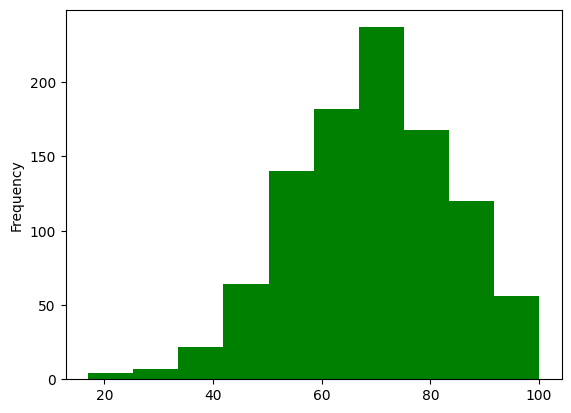

In [110]:
df['reading_score'].plot.hist(color='g')

### TABEL DISTRIBUSI WRITING SCORE

In [40]:
frekuensi = pd.cut(df["writing_score"], interval)
frekuensi.value_counts(sort=False).rename_axis('writing_score').reset_index(name='frekuensi')

,writing_score,frekuensi
0,"(0, 10]",1
1,"(10, 20]",2
2,"(20, 30]",7
3,"(30, 40]",25
4,"(40, 50]",89
5,"(50, 60]",177
6,"(60, 70]",243
7,"(70, 80]",248
8,"(80, 90]",140
9,"(90, 100]",68


### HISTOGRAM WRITING SCORE

<AxesSubplot:ylabel='Frequency'>

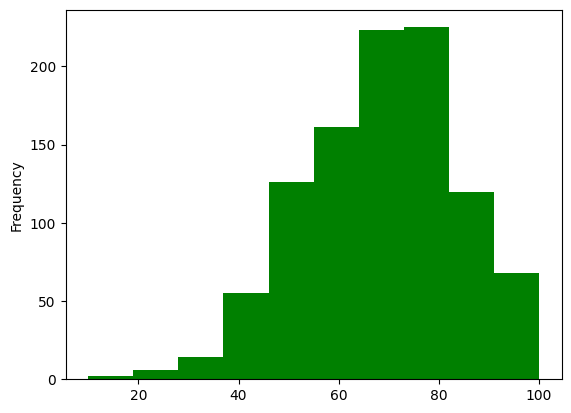

In [108]:
df['writing_score'].plot.hist(color='g')

### TENDENSI CENTRAL

In [119]:
def tendensi(data):
    temp = [df[data].mean(),
            df[data].median(),
            df[data].mode()[0],
            df[data].max(),
            df[data].min()]
    return temp

data_reading = tendensi('reading_score')
data_writing = tendensi('writing_score')

tendensi_central = {
    'reading_score' : data_reading,
    'writing_score' : data_writing,
}

pd.DataFrame(tendensi_central, index = ['rata_rata','median','modus','nilai max',' nilai min'])

,reading_score,writing_score
rata_rata,69.169,68.054
median,70.000,69.000
modus,72.000,74.000
nilai max,100.000,100.000
nilai min,17.000,10.000


### NILAI VARIASI

In [120]:
def variasi(data):
    temp = [df[data].var(),
            df[data].std(),
            df[data].max()-df[data].min(),
            df[data].quantile(.25),
            df[data].quantile(.50),
            df[data].quantile(.75),
            df[data].quantile(.75)-df[data].quantile(.25)]
    return temp

data_reading = variasi('reading_score')
data_writing = variasi('writing_score')

nilai_varians = {
    'reading_score' : data_reading,
    'writing_score' : data_writing,
}

pd.DataFrame(nilai_varians, index = ['varians','standar deviasi','jangkauan range','kuartil 1','kuartil 2','kuartil 3','kisaran interkuartil'])

,reading_score,writing_score
varians,213.165605,230.907992
standar deviasi,14.600192,15.195657
jangkauan range,83.000000,90.000000
kuartil 1,59.000000,57.750000
kuartil 2,70.000000,69.000000
kuartil 3,79.000000,79.000000
kisaran interkuartil,20.000000,21.250000


### BOX PLOT

<AxesSubplot:>

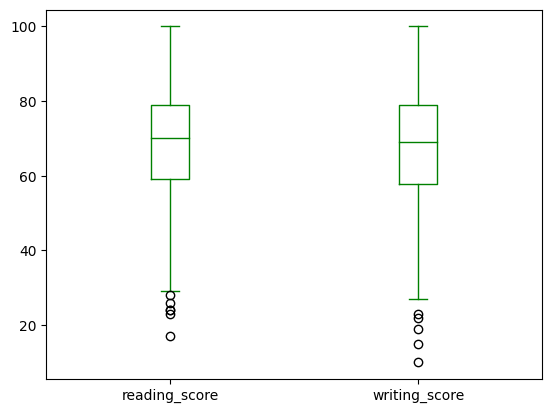

In [121]:
df[['reading_score', 'writing_score']].plot.box(color='g')

### NILAI SKEWNESS & KURTOSIS

In [122]:
print("Nilai Skewness:",df["writing_score"].skew())
print("Nilai Kurtosis:",df["writing_score"].kurt())

Nilai Skewness: -0.28944397150761897
Nilai Kurtosis: -0.03336461500693577


In [123]:
print("Nilai Skewness:",df["reading_score"].skew())
print("Nilai Kurtosis:",df["reading_score"].kurt())

Nilai Skewness: -0.25910451810923063
Nilai Kurtosis: -0.0682654585647704


### SCATTER PLOT

<AxesSubplot:xlabel='reading_score', ylabel='writing_score'>

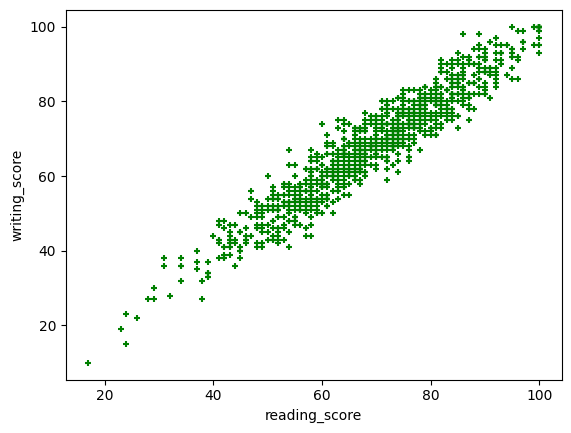

In [124]:
df.plot.scatter(x = 'reading_score', y = 'writing_score', c='g', marker='+')